# Pymaceuticals Inc.
---

### Analysis

The purpose of this study was to analyze the effectiveness of Capomulin at reducing the size of squamous cell carcinomas (SCC) by comparing it to a range of different drug regimens. The study included a total of ten different drug treatment programs over a 45 day study that consisted of 249 mice. The mice were nearly an even split between male (51%) and female (49%) populations to apply nearly an equal weighting between the different sexes.
 
The first step was to review the data and clean up any issues with missing or duplicate data. There was only a minor issue where some duplicate information needed to be removed for clarity. From there I focused on the tumor volume data and performed basic statistics analysis. Based on this initial data it was clear which drug treatments would require further analysis.
 
The statistical analysis showed one other treatment, Ramicane, that performed very closely to the initial drug of interest, Capomulin. Two other drugs were selected based on the next best combination of 'Mean Tumor Volume' and 'Tumor Volume STD'.
 
Considering the four treatments that were closely analyzed, Capomulin, Ramicane, Infubinol, and Ceftamin.
It is clear that Capomulin and Ramicane are most effective at reducing the size of the squamous cell carcinomas (SCC) that were studied. The box plot clearly shows they have the lowest final tumor volume of the four drugs. Their standard deviation and variance are also narrower and therefore have more consistent results based the this analysis of SCC.
 
The final piece of analysis focused on the correlation between average tumor volume and mouse weight for mice tested with the Capomulin drug treatment. The data shows a very high positive correlation of 0.84 between the tumor volume and the weight of the mice. Meaning that a mouse with a higher weight is very likely to have a larger tumor volume if they are being treated with the Capomulin drug. 

Considering this piece of information there could be further analysis to normalize the measurements based on the weight of the mice to understand if the resluts are not potentially skewed if one treatment happends to have a higher proption of heavier mice compared to the other treatments.




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Review imported data to verify which column to merge on
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview

mouse_study_df.head()
#mouse_study_df.info()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Rename columns for easier reference
mouse_study_df = mouse_study_df.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", 
                                                "Tumor Volume (mm3)": "Tumor_Volume(mm3)", "Metastatic Sites": "Metastatic_Sites",
                                                "Weight (g)": "Weight(g)"})
mouse_study_df.head()

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight(g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = mouse_study_df["Mouse_ID"].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = mouse_study_df.loc[:,["Mouse_ID","Timepoint"]].value_counts()
dup_mice_ID

## "g989" has multiple entries for Timepoint, so it needs to be removed from the dataset

Mouse_ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_study_df.columns

dupe_data_df = mouse_study_df.loc[mouse_study_df["Mouse_ID"] == "g989", :]
dupe_data_df

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight(g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df.Mouse_ID != 'g989']
clean_mouse_study_df = clean_mouse_study_df.reset_index(drop=True)
clean_mouse_study_df


,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight(g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_mouse_study_df["Mouse_ID"].nunique()
mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_mouse_study_df.groupby("Drug_Regimen")["Tumor_Volume(mm3)"].mean()
tumor_median = clean_mouse_study_df.groupby("Drug_Regimen")["Tumor_Volume(mm3)"].median()
tumor_var = clean_mouse_study_df.groupby("Drug_Regimen")["Tumor_Volume(mm3)"].var()
tumor_std = clean_mouse_study_df.groupby("Drug_Regimen")["Tumor_Volume(mm3)"].std()
tumor_sem = clean_mouse_study_df.groupby("Drug_Regimen")["Tumor_Volume(mm3)"].sem()

tumor_stats_df = pd.DataFrame({"Mean_Tumor_Vol": tumor_mean, "Median_Tumor_Vol": tumor_median, 
                             "Tumor_Vol_Var": tumor_var, "Tumor_Vol_Std": tumor_std, "Tumor_Vol_SEM": tumor_sem})
tumor_stats_df.sort_values("Mean_Tumor_Vol", ascending=True)


,Mean_Tumor_Vol,Median_Tumor_Vol,Tumor_Vol_Var,Tumor_Vol_Std,Tumor_Vol_SEM
Drug_Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_stats_agg_df = clean_mouse_study_df.groupby("Drug_Regimen")["Tumor_Volume(mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_stats_agg_df.sort_values("mean", ascending=True)


,mean,median,var,std,sem
Drug_Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

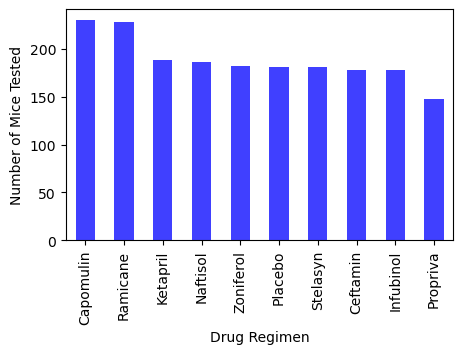

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df_bar = clean_mouse_study_df.groupby("Drug_Regimen")["Timepoint"].count().sort_values(ascending=False)

df_bar.plot(kind = "bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested", figsize = (5,3), 
            color = "b", alpha =0.75, align = "center")




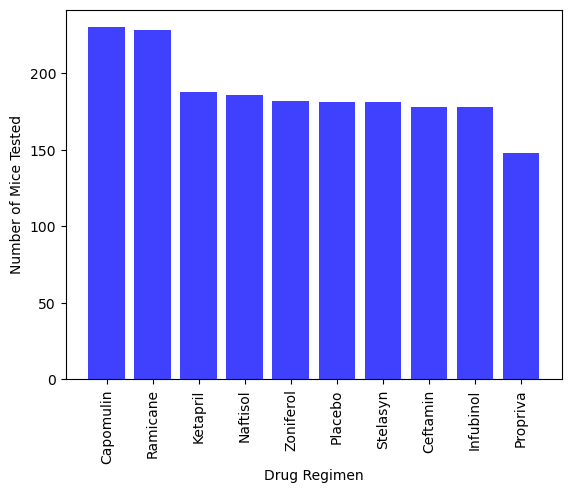

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df_bar = clean_mouse_study_df.groupby("Drug_Regimen")["Timepoint"].count().sort_values(ascending=False)

x_axis = df_bar.keys()
y_axis = df_bar

plt.bar(x_axis, y_axis, color='b', alpha=.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()


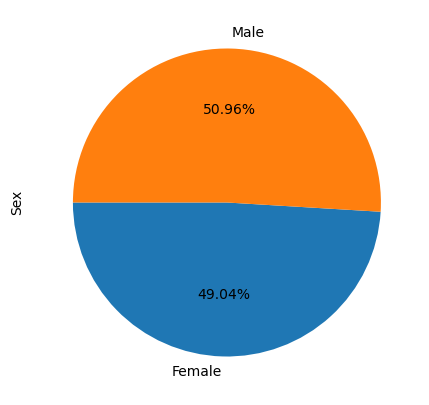

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_pie = clean_mouse_study_df.groupby("Sex")["Mouse_ID"].count()

pie_plot = df_pie.plot(kind = "pie",ylabel="Sex", autopct="%1.2f%%", startangle=180, figsize = (5,5))


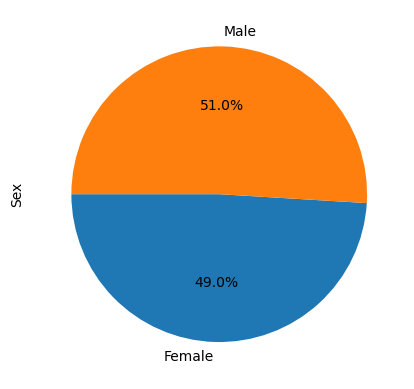

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_pie = clean_mouse_study_df.groupby("Sex")["Mouse_ID"].count()
plt.pie(df_pie, labels=df_pie.keys(), autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time_df = clean_mouse_study_df.groupby(["Mouse_ID"])["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_study_df = pd.merge(final_time_df, clean_mouse_study_df, on=["Mouse_ID","Timepoint"], how="left")
#print(final_time_df.head())
#print(clean_mouse_study_df.head())

# used to verify data merged as expected, also to verify outlier in next steps
tumor_study_df[30:35]

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight(g)
30,c302,45,64.575222,4,Zoniferol,Female,10,29
31,c326,5,36.321346,0,Infubinol,Female,18,25
32,c402,45,74.040390,3,Stelasyn,Female,1,27
33,c458,30,38.342008,2,Ramicane,Female,23,20
34,c559,45,61.840058,4,Zoniferol,Female,19,28


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

for drug in drug_list:
    tumor_vol.append(tumor_study_df.loc[tumor_study_df["Drug_Regimen"] == drug, "Tumor_Volume(mm3)"])
     
    
# Quick check to make sure the data is correct          
#tumor_vol    

# Inidividual tumor volume for each drug regimen because 'tumor_vol' is a list that does not work with quantile function
cap_tumor_vol = tumor_study_df.loc[tumor_study_df["Drug_Regimen"] == "Capomulin", "Tumor_Volume(mm3)"]
ram_tumor_vol = tumor_study_df.loc[tumor_study_df["Drug_Regimen"] == "Ramicane", "Tumor_Volume(mm3)"]
inf_tumor_vol = tumor_study_df.loc[tumor_study_df["Drug_Regimen"] == "Infubinol", "Tumor_Volume(mm3)"]
cef_tumor_vol = tumor_study_df.loc[tumor_study_df["Drug_Regimen"] == "Ceftamin", "Tumor_Volume(mm3)"]


# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

# capoumulin info
cap_quartiles = cap_tumor_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outliers = []

for vol in cap_tumor_vol:
    if vol < cap_lower_bound or vol > cap_upper_bound:
        cap_outliers.append(vol)
       

# # ramican info
ram_quartiles = ram_tumor_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_outliers = []

for vol in ram_tumor_vol:
    if vol < ram_lower_bound or vol > ram_upper_bound:
        ram_outliers.append(vol)
       

# infubinol info
inf_quartiles = inf_tumor_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_outliers = []

for vol in inf_tumor_vol:
    if vol < inf_lower_bound or vol > inf_upper_bound:
        inf_outliers.append(vol)
       


# ceftamin info
cef_quartiles = cef_tumor_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
cef_outliers = []

for vol in cef_tumor_vol:
    if vol < cef_lower_bound or vol > cef_upper_bound:
        cef_outliers.append(vol)
       
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Note: This data already exists in the merged dataframe 'tumor_study_df', and the list of tumor volumes is 'tumor_vol'
    
    # add subset 
    # Determine outliers using upper and lower bounds
    
print(f"Capomulin's potential outlier(s): {cap_outliers}")
print(f"Ramicane's potential outlier(s): {ram_outliers}")
print(f"Infubinol's potential outlier(s): Row 31,  {inf_outliers}")
print(f"Ceftamin's potential outlier(s): {cef_outliers}")

Capomulin's potential outlier(s): []
Ramicane's potential outlier(s): []
Infubinol's potential outlier(s): Row 31,  [36.3213458]
Ceftamin's potential outlier(s): []


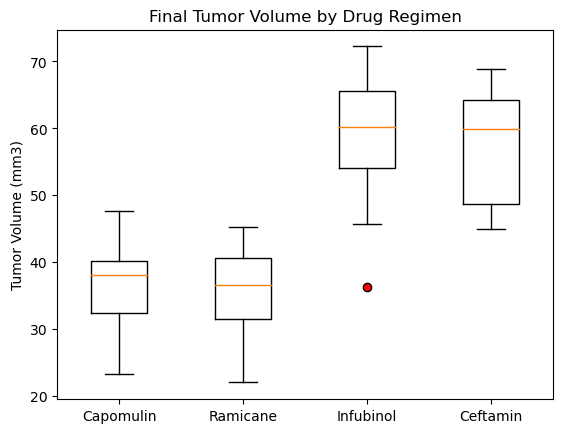

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=drug_list, flierprops=dict(markerfacecolor='r', marker='o'))
plt.show()

## Line and Scatter Plots

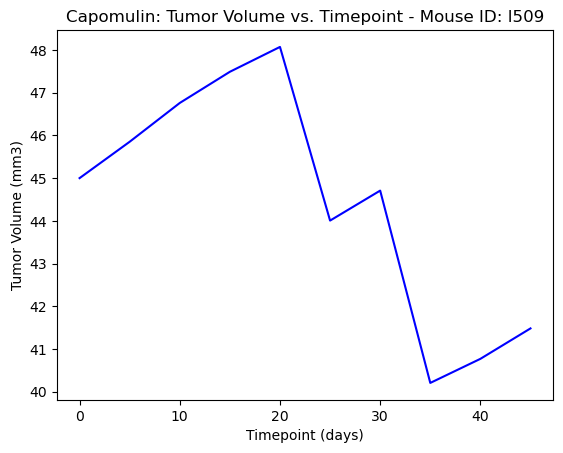

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug_Regimen"] == "Capomulin") & (clean_mouse_study_df["Mouse_ID"] == "l509"),:]
# capomulin_df

#mouse_df = capomulin_df.loc[capomulin_df["Mouse_ID"] == "l509", :] 
x_axis = capomulin_df["Timepoint"]
y_axis = capomulin_df["Tumor_Volume(mm3)"]

plt.plot(x_axis, y_axis, color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Volume vs. Timepoint - Mouse ID: l509")
plt.show()


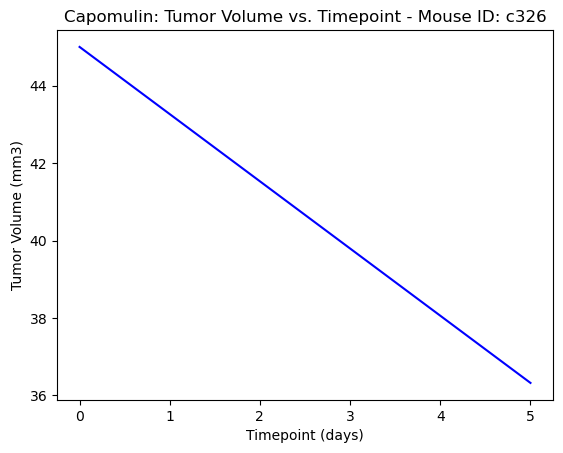

In [18]:
##### Not part of requested analysis. Just my own curiosity on the outlier from the data set. #####

# Closer inspection of the outlier mouse ID c326 shows that the mouse only had two data points at 0 and 5 days.

infubinol_df = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug_Regimen"] == "Infubinol") & (clean_mouse_study_df["Mouse_ID"] == "c326"),:]
#infubinol_df

x_axis = infubinol_df["Timepoint"]
y_axis = infubinol_df["Tumor_Volume(mm3)"]

plt.plot(x_axis, y_axis, color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Tumor Volume vs. Timepoint - Mouse ID: c326")
plt.show()

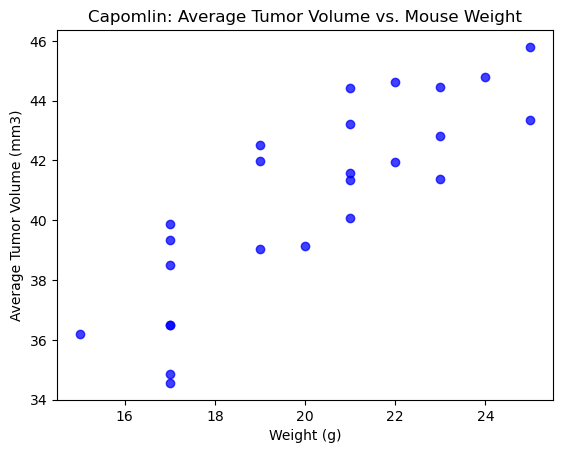

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug_Regimen"] == "Capomulin", :]


x_axis = capomulin_df.groupby("Mouse_ID")["Weight(g)"].mean()
y_axis = capomulin_df.groupby("Mouse_ID")["Tumor_Volume(mm3)"].mean()

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomlin: Average Tumor Volume vs. Mouse Weight")
plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug_Regimen"] == "Capomulin", :]


x_weight = capomulin_df.groupby("Mouse_ID")["Weight(g)"].mean()
y_tumor_vol = capomulin_df.groupby("Mouse_ID")["Tumor_Volume(mm3)"].mean()

correlation = st.pearsonr(x_weight,y_tumor_vol)
print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')


The correlation between mouse weight and average tumor volume is 0.84


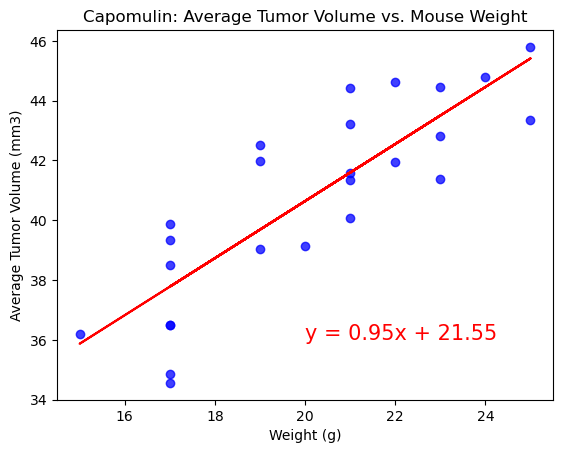

In [21]:
# linear regression model to get slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_tumor_vol)
regress_values = x_weight * slope + intercept

# string to display equation graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

# plot scatter plot with regression line
plt.scatter(x_weight, y_tumor_vol, marker="o", facecolors="blue", alpha=0.75)
plt.plot(x_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")
plt.show()